<a href="https://colab.research.google.com/github/AaronScott2025/FeatureExtraction-ImageAlignment/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to perform filtering on an image
import cv2
# Used to create kernels for filtering
import numpy as np

# A - Harris Corner Detector

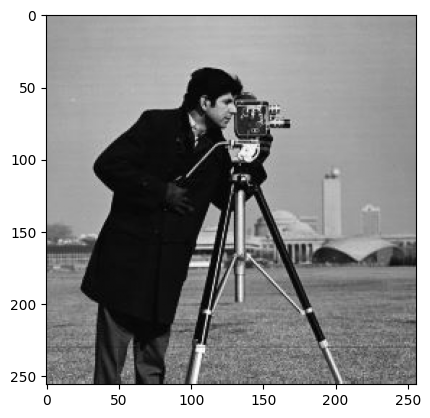

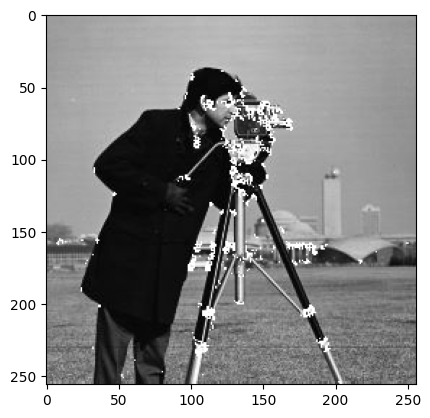

In [40]:
image = cv2.imread("cameraman.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show() #Original Image

gradientx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5) #Compute X Gradients (1, 0)
gradienty = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5) #Compute Y Gradients (0, 1)

gradients = cv2.addWeighted(gradientx, 0.5, gradienty, 0.5, 0) #Combines both gradients with weighted sum
gradients = gradients.astype(np.float32) #Ensures proper typing with cornerHarris

harris = cv2.cornerHarris(gradients, 2, 3, 0.04) #Calculates cornerHarris
image[harris > 0.01 * harris.max()] = [255] #Highlights the corners
plt.imshow(image, cmap='gray')
plt.show()

# B - Scale Invariance

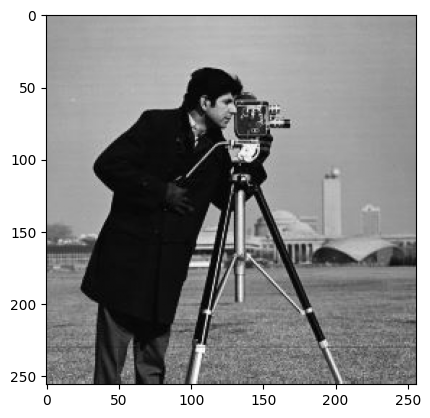

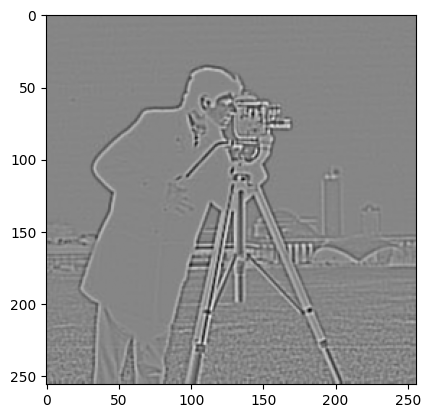

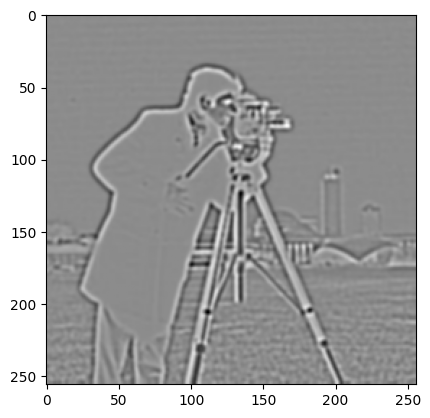

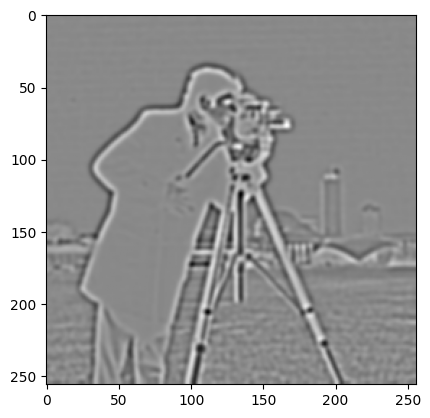

In [7]:
image = cv2.imread("cameraman.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

i1 = cv2.Laplacian(image, cv2.CV_64F, ksize=5) #Attempt with k5
plt.imshow(i1, cmap='gray')
plt.show()
i2 = cv2.Laplacian(image, cv2.CV_64F, ksize=11) #Attempt with k11
plt.imshow(i2, cmap='gray')
plt.show()
i3 = cv2.Laplacian(image, cv2.CV_64F, ksize=15) #Attempt with k15
plt.imshow(i3, cmap='gray')
plt.show()

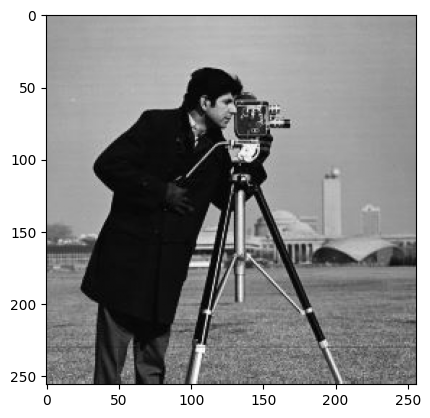

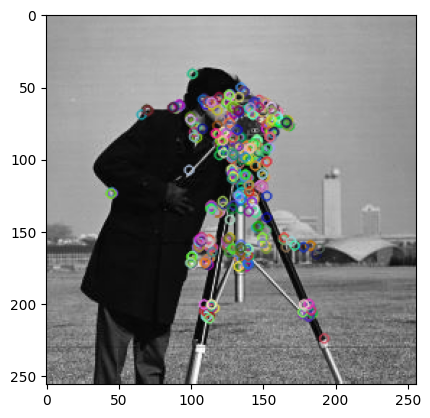

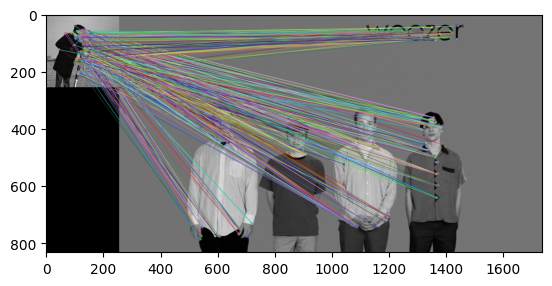

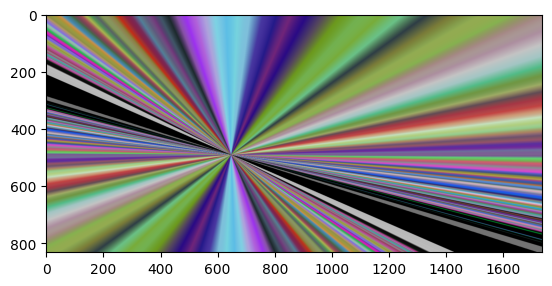

In [36]:
image = cv2.imread("cameraman.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("weezer.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

#Keypoints and Descriptors
orb = cv2.ORB_create() #Create an Orb object
keypoints, descriptors = orb.detectAndCompute(image, None) #Detects keypoints, and apperences of those keypoints
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)
img = cv2.drawKeypoints(image, keypoints, None) #Highlight the features
img2 = cv2.drawKeypoints(image2, keypoints2, None)
plt.imshow(img, cmap='gray')
plt.show()

#Matcher
bf = cv2.BFMatcher() #Create a brute force matcher
matches = bf.match(descriptors, descriptors2) #Matches descriptors between the 2 images
matched_image = cv2.drawMatches(image, keypoints, image2, keypoints2, matches, None) #Connects matched points
plt.imshow(matched_image)
plt.show()

#Homography
src_pts = np.float32([keypoints[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2) #Points on 1st image reshaped
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2) #Points on 2nd image reshaped
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0) #Ransac excludes outliers, with 5.0 representing the threshold for the outliers to be excluded. Line estimates the transformation matrix

#Warping
height = matched_image.shape[0] #Get Image Shape (Height)
width = matched_image.shape[1] #Get Image Shape (Width)
warped_image = cv2.warpPerspective(matched_image, H, (width, height)) #Warp the image using the match, the homography, and the shape of the image
plt.imshow(warped_image, cmap='gray')
plt.show()